In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [2]:
# tf.__version__

In [3]:
# !pip3 install tensorflow

In [4]:
# import sys
# sys.executable

In [5]:
# sys.version

In [6]:
import pandas as pd                                 #importing dataframes
import librosa as lr                                #feature extraction(read and manipulate audio files)
import soundfile as sf
import os

In [7]:
def extract_feature(file):
    X, sample_rate = sf.read(file, dtype='float32')
    if X.ndim > 1: X = X[:,0]
    X = X.T

    mfccs = np.mean(lr.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    print(mfccs)
    return list(mfccs)


In [8]:
features = [feature for feature in os.listdir('Binary') if feature[0] != '.' and os.path.isdir(f'Binary/{feature}')]
label_map = { i: value for i, value in enumerate(features) }
label_map_inverse = { value: i for i, value in enumerate(features) }

In [9]:
in_out = []
for feature in features:
    base = f'Binary/{feature}'
    for data in os.listdir(base):
        with open(f"{base}/{data}", "rb") as file:
            X = extract_feature(file)
        X.append(label_map_inverse[feature])
        in_out.append(X)

[-2.30815152e+02  8.55438443e+01  9.53042984e-01  9.78709691e+00
 -6.77437067e+00 -9.10514014e+00 -1.50661565e+01 -6.41204693e+00
 -5.66472449e+00 -5.48483050e+00 -6.84614855e+00 -3.94243291e+00
 -5.78783894e+00 -4.72362669e+00 -7.49421203e+00 -3.60169616e+00
 -7.60000912e+00 -4.98239208e+00 -5.37025375e+00 -3.91354130e+00
 -5.08367821e+00 -2.84258329e+00 -4.70177870e+00 -3.04691259e+00
 -2.97548010e+00  4.05463737e-01 -9.96470174e-01 -1.56107370e-01
 -7.73954018e-01 -1.14277129e+00 -2.72550990e+00 -4.05517101e+00
 -4.15707129e+00 -2.46553403e+00 -3.76600498e+00 -2.32350836e+00
 -2.23227504e+00 -2.50578955e+00 -2.52798243e+00 -1.84355423e+00]
[-1.18925221e+02  6.40859782e+01 -3.01485178e+01 -5.26050911e+00
 -2.67470984e+01 -1.72030161e+01 -2.25936011e+01 -1.11370371e+00
 -6.60157968e+00 -5.75021736e+00 -9.80571323e+00 -5.92387279e+00
 -6.28782131e+00 -8.67038454e+00 -4.30051802e+00 -4.11035963e+00
 -4.12899161e+00 -6.78198714e-01 -6.69927715e+00 -2.45402411e+00
 -3.29680677e+00 -2.0833

[-3.71888939e+02  8.50843109e+01  3.25870381e+01  5.70047560e+00
 -1.84078222e+01  2.11163885e+01  1.20818464e+01  5.26666679e+00
  4.26888396e+00 -5.71648757e-01 -7.76192919e+00  8.85465366e+00
 -1.45437212e+01  1.43747592e+01 -1.43126256e+01  8.75205805e+00
 -6.03033977e+00  1.04784765e+01  2.50190197e+00  7.66281735e+00
  4.45757243e-01 -8.52571909e-02 -6.31088515e+00 -7.88453626e+00
 -1.43239750e-01 -2.84283286e+00  3.93630011e+00 -4.18568106e+00
 -3.61849343e-01 -6.14869640e+00 -2.50583574e+00  1.58954396e+00
 -8.27027643e-01  5.15976731e+00 -4.11742475e+00  3.45919499e+00
 -2.69888710e+00  7.87405374e+00 -6.16445936e+00  5.36594316e+00]
[-3.08859867e+02  1.44235934e+02 -7.36390233e+00  2.00999903e+01
 -1.10721996e+00 -1.41133957e+01  2.02579259e+01  1.01300919e+01
 -5.59857868e+00  4.85950887e+00  6.19000893e+00  2.84359198e+00
  2.81030884e+00 -2.83304840e+00 -8.73924373e-01  3.18522426e+00
 -3.43744232e+00 -1.57463498e+00  3.69001607e+00  2.16995146e+00
  4.12255369e+00  3.3117

[-3.67299893e+02  1.26662047e+02  1.13301065e+01 -8.38321872e-01
  2.83692699e+00  2.17161329e+01  3.04870176e-01  1.64521235e+01
  1.21783005e+01 -5.51259276e+00  1.03546548e+01  8.06414802e+00
  7.05372717e+00  1.11058405e+01  8.68673475e+00  9.28571824e+00
 -2.03148136e+00 -5.44073345e+00 -5.35627851e+00  8.94310343e-01
  7.38444112e+00  3.19270519e+00 -3.24558165e-01 -3.36994542e+00
 -7.03182838e+00  3.58060202e+00  5.71183133e+00  4.75009919e+00
 -1.77423928e+00 -9.28423961e-01 -1.45827713e+00  1.60514599e+00
 -2.84140802e+00 -6.44439670e+00  2.31906372e-01  3.37721981e+00
 -2.71057365e+00 -7.27032379e+00 -4.91341419e+00  3.21569889e+00]
[-350.74225665  102.63155223   15.54308693    7.3800261   -19.03570639
   18.81061654    6.54402972    4.75404901    4.45904616   -6.64371418
  -12.07475386    6.92712696  -12.68776439   17.44386164  -15.1384161
   10.53815291   -5.94532384    4.69083102   -4.43088427   -2.44976637
   -5.99113697   -1.29510202   -0.73093337   -2.86323006    1.7678

[-3.76765661e+02  1.12645459e+02  1.78817846e+01  1.46523871e+00
  3.59328709e+00  1.28391214e+01  2.06082871e+00  1.43551747e+01
  1.34759046e+01 -1.66127166e+00  4.10642938e+00  5.04340604e+00
  2.23517964e+00 -1.97930470e-01  1.17234377e+00  7.18933228e+00
  3.97814647e+00  4.22452486e+00  2.79488713e+00  1.42026934e+00
 -1.29396467e+00 -1.52379059e+00 -7.53736401e-01  1.94440765e+00
 -4.98659214e+00 -5.07685532e-01 -1.14990642e+00  2.53354884e+00
 -6.65204618e-01  2.25933322e+00 -5.69902649e-01  1.24101628e+00
  1.53791060e+00  1.77935187e-02 -4.58805919e-02 -5.89228266e-01
 -2.21124726e-01  1.44353508e+00 -1.01619292e+00  1.53485211e+00]
[-3.09367620e+02  1.36081252e+02 -1.12551984e+01  2.45339455e+01
  6.68973658e+00 -3.04830218e+00  2.27384545e+01  1.14791027e+01
  1.42718630e+00  7.98823833e+00  1.32424408e+00 -1.51622098e+00
  5.96856677e+00  5.88563088e+00  5.56745359e+00  4.34199078e+00
  6.72714698e-01  2.44103365e+00  2.85394235e+00  1.54154849e+00
  4.30415761e+00  3.6115

[-3.53582481e+02  1.11012966e+02  1.96014067e+01  2.28715920e+01
  1.79499648e+01  3.20706215e+01  4.85961284e+00  1.07190027e+01
  7.01739360e+00  3.60417396e+00  6.93915896e+00  2.32437207e-01
  3.59670510e+00  2.85337061e+00  2.63937182e+00  7.36304524e+00
  3.88204874e+00  3.26532271e+00  1.54807267e+00  1.11796457e+00
 -4.90405645e-01  1.69006097e+00 -6.83013984e-01  2.65719228e-01
 -3.78206829e+00 -1.82845907e+00 -4.63604444e+00 -7.90686881e-01
  2.03738724e-02  1.09550095e+00 -3.31593803e+00 -1.76078062e+00
 -1.06491809e+00  7.19566631e-01  4.04469311e-01 -6.20943932e-02
 -1.83681820e+00  1.48235713e+00 -3.66042176e-01  4.16184107e-02]
[-1.07970702e+02  6.60502126e+01 -3.09996858e+01 -1.84767072e+00
 -2.61211658e+01 -1.53531942e+01 -2.35840798e+01 -3.63364482e+00
 -3.46657470e+00 -4.17840338e+00 -1.06366637e+01 -6.20115100e+00
 -6.28017102e+00 -9.27293592e+00 -7.17426153e-01 -4.23969797e+00
 -3.42334403e+00 -2.40528234e+00 -7.68990914e+00 -2.88223504e+00
 -2.56189412e+00 -1.9438

[-3.28893217e+02  1.14865204e+02  2.65410710e-02  1.54380458e+01
  5.38645637e+00  8.12402898e+00 -2.19593375e+00  2.35250765e+01
  1.65991029e+00 -3.77346372e+00  1.14909003e+01 -2.82520363e+00
  7.66388487e+00  8.33802789e+00  6.80575785e+00  1.53608762e+01
  5.86744817e+00  7.79578442e+00  1.44949744e+00 -3.28005938e+00
  4.27162789e-01 -3.61473006e-01 -3.94079209e+00 -1.12192948e+00
 -1.87597535e+00 -5.18495425e-02 -2.63551761e+00  3.53034642e+00
  1.81414572e-03  6.32298013e-01  1.38500707e+00  1.85649650e+00
  1.08824452e+00 -8.03349045e-01 -2.09584562e+00  2.22453309e+00
  2.58453860e-01  6.13073461e-01 -1.27247678e+00 -1.69032957e+00]
[-1.61039104e+02  7.59614809e+01 -2.21691234e+01 -1.95589444e-01
 -1.97141140e+01 -1.42187723e+01 -2.16527807e+01 -2.74607583e+00
 -3.23113704e+00 -3.58382954e+00 -7.99978617e+00 -6.89232570e+00
 -5.40335773e+00 -1.09746842e+01 -3.01917877e+00 -4.24047246e+00
 -5.13177349e+00 -1.60929477e+00 -5.35400382e+00 -1.69882031e+00
 -1.11082297e+00 -1.9591

[-3.54937579e+02  5.69747005e+01  1.59616227e+01  8.19408381e+00
 -2.71494398e+01  2.54160788e+01  5.68359281e+00  3.23666438e+00
  2.76329697e+00  5.35584676e-01 -7.14665563e+00  1.03355658e+01
 -1.09806750e+01  1.24870857e+01 -1.75596485e+01  9.19410412e+00
 -8.08205688e+00  4.44750810e+00 -6.42566595e+00  2.90810591e+00
 -6.48022724e-01  7.08757319e+00  6.83831221e+00  7.10244191e+00
  6.77509680e+00 -2.85899579e+00 -2.85351890e-01 -7.07918634e+00
 -5.43517634e-01 -4.69468387e+00 -2.55464693e+00 -5.19060637e-01
 -3.38048105e+00  1.37396508e+00 -6.96259867e+00  1.03412911e+00
 -5.72358412e+00  6.68920183e+00 -7.27145253e+00  5.74389262e+00]
[-2.76137471e+02  1.61686299e+02  6.74712675e+00  2.73328587e+01
  2.00448118e+01  7.75028205e+00  1.70183051e+01  3.94449877e+00
  2.26367685e+00  1.24585501e+01  4.40848168e+00  1.33182717e+00
  1.77532409e+00 -2.12753142e+00  2.56197671e+00  4.64551143e+00
 -4.48768388e+00 -3.91175716e+00  2.66825566e+00  5.84635626e-01
 -2.16898476e+00 -5.6133

[-3.28198609e+02  1.12460036e+02  2.39597818e+01  1.14225034e+01
 -6.42269981e+00  1.96716791e+01 -2.12758858e+00  1.26470286e+01
  9.97551658e+00 -5.69261899e+00  7.19721715e+00  3.26061095e+00
  3.78852565e+00 -1.29140947e-01 -3.08695983e+00  2.91372079e+00
  3.21711185e+00  3.92379840e+00  4.25334111e+00  3.18096795e+00
  3.97784328e+00  3.05042191e+00  2.06975217e+00  6.16566464e+00
 -1.29147262e+00  1.82492897e+00 -1.72790219e+00 -3.81497842e-01
 -2.88506763e+00 -1.71082834e+00 -2.86484837e+00 -5.19339930e-01
 -2.62409952e+00 -1.86844728e-01 -1.15816018e+00  8.65326557e-01
 -1.03942328e+00 -6.13324511e-01 -1.01357128e+00  2.27627397e+00]
[-3.28628522e+02  1.12524314e+02  5.18770340e+00  1.18001066e+01
  5.47280511e+00  7.25683469e+00 -9.93943934e+00  7.90900260e+00
  7.28245955e+00 -1.47342168e+00  6.86600816e+00  1.00904395e+00
  5.20983818e-02 -3.85951615e+00 -4.17980694e+00  2.87905614e+00
 -5.22875915e-01  1.85952948e+00  5.33729175e+00  2.60807512e+00
  7.13412708e+00  6.2467

[-3.52909539e+02  1.08844436e+02  4.49031399e+00  2.46742790e+01
  1.36244000e+01  1.62624481e+01  6.40364693e+00  1.88563733e+01
  5.54546994e+00  8.29772579e+00 -2.10019287e-01 -6.73711864e+00
  8.13986361e+00  5.07528380e+00  1.76228763e+00  3.37224729e+00
  2.37112549e+00  6.90853764e+00  4.82038403e+00  2.81054467e+00
  6.34371785e+00  4.09966665e+00 -4.27836816e+00 -9.09727327e-01
 -2.25755586e+00  1.49481776e+00  2.45445719e-01  8.02385286e-01
 -4.54267728e+00 -4.17307801e+00 -9.46758548e-01 -2.41347276e-01
 -1.49726486e+00  4.34434696e-01  3.37094539e-01  1.74863325e+00
 -3.25753996e+00  3.38835384e-01  7.74156951e-02  1.35646247e+00]
[-3.03630075e+02  1.39329209e+02 -1.76934329e+00  2.42343626e-01
 -2.59508681e+00  1.10121187e+01 -4.65470639e+00  8.15206280e+00
  6.65964448e-02  5.29955712e+00  1.76453805e+01 -8.66864371e-01
  3.16330148e-01 -4.54708535e-02  4.56145459e+00  1.02452594e+01
 -2.34592443e+00  2.52492169e-01  3.70065084e+00  5.14222510e-01
 -3.11067893e+00 -2.0572

[-1.78614693e+02  1.58750682e+02 -4.96414681e+01  4.63582257e+01
  3.31350412e-01  7.59565843e-01  1.81792816e+01 -9.65738072e+00
  1.41848310e+01 -2.84612876e+00  9.72116856e+00  6.34619222e+00
  2.88037969e+00  4.09201954e+00 -7.16177101e+00  6.08578521e+00
 -9.96693545e+00  3.00691526e+00 -1.07803414e+01 -4.12215423e-01
 -5.55303107e+00  1.36733942e+00 -7.18639440e+00  2.27274516e+00
 -8.66621953e+00  4.86892546e-01 -1.04017431e+01 -2.53859526e+00
 -7.12520765e+00  2.98617202e-01 -4.00755444e+00 -1.39817015e-01
 -5.24973807e+00 -1.35643270e+00 -2.88327765e+00 -1.36977342e+00
  1.80823690e+00 -7.27623523e+00  2.07548781e+00 -3.56130773e+00]
[-4.08079085e+02  1.56654555e+02 -1.71249687e+01 -2.12359317e+01
  2.82785734e+01 -7.35751341e+00 -3.90728758e+01  2.78181448e-01
  1.26846282e+01 -2.41850288e+01 -2.26920423e+01  9.59479720e+00
  4.02327054e-01 -2.08159576e+01 -4.00417401e+00  1.07132981e+01
 -5.94858795e+00 -1.17941180e+01  3.01939055e+00  2.93225687e+00
 -7.65717757e+00 -3.3604

[-1.52812896e+02  6.60810584e+01 -2.78738281e+01 -4.81398771e+00
 -2.74096957e+01 -1.95160676e+01 -2.41152992e+01 -3.98915920e+00
 -6.07247888e+00 -6.75736940e+00 -1.11191144e+01 -7.76517663e+00
 -7.97228337e+00 -1.13514671e+01 -5.95273167e+00 -6.52328964e+00
 -4.41893344e+00 -2.94876371e+00 -6.66323833e+00 -3.20237198e+00
 -2.23173701e+00  2.93071295e-01 -5.28206499e-01  1.70481960e-01
 -1.59182960e+00 -1.91070603e-01  2.96892881e-01  5.28812552e-01
  9.12278080e-01  1.90319722e+00  5.47700726e-01  1.87328733e+00
  1.66444456e+00  2.72668201e+00  9.19147609e-01  1.35737992e+00
  4.89718242e-02  2.04459190e+00  2.15127904e+00  6.95644401e-01]
[-2.86630647e+01  4.76224635e+01 -4.82200020e+01 -1.62694250e+01
 -3.39157614e+01 -1.62069615e+01 -1.89008174e+01 -1.42182809e+00
 -2.02728930e+00 -8.46041366e+00 -1.31475652e+01 -6.52410747e+00
 -6.82094831e+00 -8.26595866e+00  9.41657110e-03 -5.77253534e+00
 -2.86253925e+00 -1.36934336e+00 -3.82697283e+00 -2.38446385e+00
 -2.51176571e+00 -1.4090

[-4.01995241e+02  9.65457711e+01  2.64361511e+01  8.18370718e+00
 -1.65531640e+01  1.56343154e+01  1.25069176e+01 -2.26553131e-02
  4.00160606e+00  8.30037526e-01 -1.20393345e+01  1.28766683e+01
 -1.18512486e+01  1.64953291e+01 -6.99230311e+00  9.94397734e+00
 -8.22264879e+00  6.22548813e+00 -2.50307564e+00  8.71471925e-01
 -2.35190219e+00 -2.64650766e+00  2.47804572e+00 -4.46150716e+00
  4.82887454e+00 -3.62258689e+00  1.49040048e+00 -5.16099767e+00
  2.94042286e+00 -5.16085270e+00 -5.53007458e-01  1.11987666e+00
 -5.34668435e+00  4.89359354e+00 -7.45672201e+00  1.12409165e+00
 -4.87970462e+00  5.92114464e+00 -7.74412013e+00  8.52199728e+00]
[-2.51917578e+02  1.45700110e+02  2.24559061e+00  2.29326132e+01
 -7.06049842e+00  8.37981000e+00 -6.98204485e+00  7.02137484e+00
  1.75158936e+00 -4.79313670e+00 -3.94320143e+00 -2.69826867e+00
 -5.37558468e+00  2.34439936e+00 -7.94571922e+00 -9.45558871e+00
  1.85471335e+00 -2.16682085e+00 -1.10503904e+01 -6.92144159e-01
 -1.39201188e+00 -4.0325

[-3.97706552e+02  9.77319566e+01 -3.83372899e+00 -1.16138784e+01
  1.71769819e+01 -3.56363283e+00 -3.07254167e+01 -1.41207147e+01
  3.04799270e+00 -9.71887952e+00 -1.59319679e+01 -2.43660364e+00
  1.45170758e+00 -6.06928638e+00 -4.64721048e+00  1.08736752e+00
 -1.37504304e-01 -1.45101878e+00  2.92227401e-01 -1.22245972e+00
 -3.19576636e+00 -1.56923200e+00 -1.89514444e+00 -4.79047928e+00
 -4.59035514e+00 -3.99495263e+00 -6.47690547e+00 -6.02602821e+00
 -1.05518551e+00  1.76168284e+00  3.02494412e+00  7.01088122e+00
  8.89336517e+00  5.48758803e+00  3.38981172e+00  4.30799551e+00
  2.64426548e+00 -4.26228550e-02  9.03969162e-01  1.64398760e+00]
[-1.42616462e+02  6.50224185e+01 -2.60690921e+01  8.74828475e-01
 -2.04317656e+01 -1.72947648e+01 -2.14694813e+01  9.96585647e-01
 -1.82831775e+00 -5.07918990e+00 -9.77622427e+00 -8.57465766e+00
 -4.09364754e+00 -8.29908193e+00 -1.25241130e+00 -2.56911828e+00
 -5.48486844e+00 -5.81110731e+00 -6.92661047e+00 -1.91507284e+00
  1.10569413e-01 -1.7723

[-3.42816706e+02  8.21283591e+01  2.35755880e+01 -1.79738786e+00
 -3.40677524e+01  2.06750644e+01  8.92230956e+00  6.67542354e+00
  9.79696071e-01 -2.40630832e+00 -6.58866205e+00  1.35766752e+01
 -8.66130521e+00  1.46660216e+01 -1.47938082e+01  7.93235904e+00
 -1.37647404e+01  9.49043572e-01 -8.20679718e+00  1.40869092e-01
 -4.65208364e+00  2.31875846e+00  2.68197923e+00  1.21012230e+00
  1.43836920e+00 -9.30786322e+00 -1.63277394e+00 -4.98437861e+00
  2.57009541e+00 -5.38397994e+00 -4.98234701e+00 -2.22912346e+00
 -4.63577855e+00  2.63709044e+00 -6.91395167e+00  4.07657240e-01
 -6.91514414e+00  6.06574408e+00 -5.77974127e+00  9.32302422e+00]
[-3.85376877e+02  9.83818114e+01  2.12588560e+01  6.88639393e+00
 -1.82738364e+01  1.95074510e+01  6.30622593e+00 -1.94491427e+00
  5.19722148e+00 -5.44992884e-01 -8.48960239e+00  1.06770229e+01
 -1.25191459e+01  1.71447164e+01 -7.63993960e+00  9.07717329e+00
 -8.18696542e+00  2.47712771e+00 -4.72676990e+00 -2.67228934e+00
 -4.06824966e+00 -2.5774

[-2.49585962e+02  1.21556665e+02  1.29519651e+01  4.74287980e+01
 -1.75765304e+01  1.61053160e+01 -1.26077138e+01 -2.90382075e+00
  3.31748333e-01 -8.06557597e+00 -8.34299956e+00 -5.18243669e-01
 -8.26246544e+00  6.04307446e+00 -7.31279875e+00 -4.09642107e+00
  3.61744778e+00  2.37150808e-01 -1.12022825e+01  5.19142873e-01
 -2.11775037e-01 -1.00638593e+01 -3.48024810e+00  1.24262608e+00
 -5.73545102e+00 -2.03286761e+00  8.64361642e-01 -9.55700290e-01
  5.05477577e-02 -2.51927394e+00 -1.28721696e+00  2.73869624e+00
  8.27084188e-01  1.04889075e+00  3.28339712e-01  3.75267196e+00
  1.64896582e+00 -2.52217356e+00 -1.11175323e+00 -4.19563032e+00]
[-306.35189903   47.75874701 -162.65299743  -43.47809824   -3.93067252
    7.97627806   30.97508884   54.66055702   -3.0681834   -18.87608633
    1.40070814    5.97570067   26.28403853    6.19582248   -1.43988839
   -2.86372513    5.59955376    6.7021423    -3.22499688    7.60338134
   11.08796636    1.82717623   -8.94459446    9.71745447   16.755

[-3.09965424e+02  1.38045084e+02 -6.47517491e+01 -3.46615749e+01
  2.03223894e+01 -1.84160965e+01 -1.83913666e+01  3.89887564e+00
 -2.11543634e+01 -2.67955259e+01 -1.78153168e+00  1.32142447e-01
 -4.37626269e+00 -5.12712508e+00 -1.35665675e+01 -3.58716271e+00
  1.29167041e+01  5.54158744e-01 -8.55398950e+00  7.90143852e+00
  1.41462054e+01  4.81854558e+00  1.79450917e+00  4.42016874e-01
 -4.46937037e+00 -6.67200483e+00 -4.21304831e+00  2.11577893e+00
  3.28871658e+00 -3.46564826e+00 -3.10493808e+00  1.63777318e+00
 -3.52795079e+00 -6.70348098e+00 -1.45570122e+00 -2.84807170e+00
 -5.97707259e+00 -2.11332243e-01  3.03214657e+00  7.51718088e-01]
[-262.45953494  142.55250543 -119.05513835  -43.70067728   36.46033704
  -18.44547558    0.4515387    41.62632966    9.40833124   -2.6122876
   -4.32202896  -28.32297998   -1.09485779   37.25526872   11.86868402
  -13.95112658   -6.47777117   -1.62371744    3.65724801    4.1235931
   -3.05659276    6.25937621    4.84589087  -17.55917108   -7.29526

[-83.96419569 -23.16746853 -62.15346657  48.41919964  46.95999362
 -15.3858656  -36.28586154  31.44454079 -39.41607337  11.07209082
 -25.00593722   1.81604385 -19.08546379  -3.64333817  -2.38442647
  -1.30853499 -10.93547637   5.65267241  -7.04930994   5.35355638
 -16.35080501   4.47084607  -2.38720112  -6.36867825  -4.03357536
  -0.95723535  -3.00140843  -1.24677843  -1.30922202  -3.02302103
  -3.00509848   1.7462046    0.13545028  -3.64627755  -2.27843812
   2.93045892  -1.58252556  -1.1303906    2.03416999   2.37660398]
[-298.97245349  122.74409737 -137.9983478   -19.67557751   56.5654711
  -22.01260962   -3.83741277   11.78114925  -29.82957954   11.10662801
   27.76658975  -33.70401117  -10.68543143   36.82964939   -3.8917482
  -19.95288314    6.76373415   -4.10096903   -3.77757219   13.06534246
   -5.10919663   -9.03483713    8.955024     -2.16637873   -7.60117405
    6.7938551     0.75798845   -4.06565729    3.07880577   -4.70200148
   -4.09729538    8.28761552   -0.58388314   -6

[-311.0589876   148.0528155   -20.05332575  -17.5875274     6.62746072
  -18.6019804    -8.97396877    4.83241057  -12.78926368  -13.75007856
   -3.1069206    -4.76389854   -1.24978852    3.3181056    -1.53905408
   -4.48810788   -6.01190236   -8.4869689    -6.03349042   -2.82510151
   -2.4854185    -2.56736467   -3.29429811   -3.81207661   -3.87994925
   -3.93918223   -2.7420907    -2.78077762   -4.21544919   -3.18675938
   -1.68716477   -0.89061458    0.98814645    0.73592882   -1.30819712
   -1.10026603   -0.87741332   -1.92577797   -2.31731128   -2.5057693 ]
[-163.67543398   67.77645048 -143.77175103   -8.25726891  -52.03509447
   16.25133576   19.42841933   22.26480213   36.90209671   13.64776143
   -8.08403796  -17.08008347  -23.3301709     5.83433286   32.97732727
    8.20276902  -20.32174807  -13.29091115    3.29849641   -3.7741788
  -12.38310445   -0.54484275   13.05091175   -1.3755482    -8.58553407
  -12.05965228    3.58696963    0.2930492    -7.99610083    2.07435933
    0.

[-3.60787608e+02  1.61939840e+02 -5.47745025e+01  2.11449883e+01
 -2.27518313e+01 -8.51423947e+00 -6.02172209e-01  1.44653862e+01
 -1.44525455e+01 -2.93586519e+00 -1.04417055e+01 -1.48004041e+01
 -3.36948298e-01 -2.65749090e+00  9.16387729e-01  1.14511393e+00
  1.08612240e+00 -8.30840279e+00 -9.77121792e+00 -8.95752135e+00
 -2.53258946e+00 -7.18618994e-02 -7.87916129e+00 -1.64709638e+01
 -9.95310266e+00 -2.98137515e+00  6.05101815e+00  3.00239146e+00
 -1.49546717e+00 -4.82399863e+00 -6.66204090e+00 -4.30113483e+00
 -5.45443940e+00 -5.85946005e+00 -4.56184185e+00  2.52592011e+00
  9.07418556e-01 -5.93538762e-01 -8.07935736e+00 -8.81030178e+00]
[-310.72993487  123.65597679 -118.85854765  -70.81147428   -8.74987703
  -39.61050844   -1.13722376   33.87081143    1.55267592    6.51118149
   17.03254015  -17.59988954  -20.05297963    2.29517593    0.76504411
    6.35381147    6.45478948  -13.87738297   -6.00244256    9.74179034
   -3.3521415    -1.91452995   10.23108793   -4.29315151  -10.546

In [10]:
arr = np.array(in_out)
X, Y = arr[:, :-1], arr[:, -1]

In [11]:
X = X.astype('float32')

In [12]:
len(X)

326

In [13]:
batch_size = 326

x_data = tf.placeholder(shape=[None, 40], dtype=tf.float32)
y_target = tf.placeholder(shape=[2, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 40], dtype=tf.float32)

b = tf.Variable(tf.random_normal(shape=[2,batch_size]))

## Linear Kernal
- k(x)= x.T*x

In [14]:
my_kernel = tf.matmul(x_data, tf.transpose(x_data))

###  Gausian Kernal

In [15]:
# gamma = tf.constant(-10.0)
# dist = tf.reduce_sum(tf.square(x_data), 1)
# dist = tf.reshape(dist, [-1,1])
# sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))
# my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

In [16]:
def reshape_matmul(mat):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [2, batch_size, 1])
    return(tf.matmul(v2, v1))

In [17]:
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target)

second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term, second_term)))

In [18]:
# rA = tf.reshape(tf.reduce_sum(tf.square(X), 1),[-1,1])
# rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
# pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(X, tf.transpose(prediction_grid)))), tf.transpose(rB))
# pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))
pred_kernel = tf.matmul(x_data, tf.transpose(prediction_grid))


In [19]:
prediction_output = tf.matmul(tf.multiply(y_target,b), pred_kernel)
prediction = tf.argmax(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(y_target,0)), tf.float32))

In [35]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [36]:
X[0]

array([-2.3081516e+02,  8.5543846e+01,  9.5304298e-01,  9.7870970e+00,
       -6.7743707e+00, -9.1051397e+00, -1.5066156e+01, -6.4120469e+00,
       -5.6647243e+00, -5.4848304e+00, -6.8461485e+00, -3.9424329e+00,
       -5.7878389e+00, -4.7236266e+00, -7.4942122e+00, -3.6016963e+00,
       -7.6000090e+00, -4.9823923e+00, -5.3702536e+00, -3.9135413e+00,
       -5.0836782e+00, -2.8425832e+00, -4.7017789e+00, -3.0469127e+00,
       -2.9754801e+00,  4.0546373e-01, -9.9647015e-01, -1.5610737e-01,
       -7.7395403e-01, -1.1427712e+00, -2.7255099e+00, -4.0551710e+00,
       -4.1570711e+00, -2.4655340e+00, -3.7660050e+00, -2.3235083e+00,
       -2.2322750e+00, -2.5057895e+00, -2.5279825e+00, -1.8435543e+00],
      dtype=float32)

In [37]:
Y_cat = tf.keras.utils.to_categorical(Y).T

In [38]:
loss_vec = []
batch_accuracy = []
for i in range(100):
    rand_index = np.random.choice(len(X), size=batch_size)
    rand_x = X[rand_index]
    rand_y = Y_cat[:, rand_index]    
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)

    if (i+1)%10==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))

Step #10
Loss = nan
Step #20
Loss = nan
Step #30
Loss = nan
Step #40
Loss = nan
Step #50
Loss = nan
Step #60
Loss = nan
Step #70
Loss = nan
Step #80
Loss = nan
Step #90
Loss = nan
Step #100
Loss = nan


In [39]:
saver = tf.train.Saver()

In [40]:
saver.save(sess, './my-model-linear')

'./my-model-linear'

In [41]:
batch_accuracy

[0.42638037,
 0.5552147,
 0.45398772,
 0.5460123,
 0.42638037,
 0.2822086,
 0.71165645,
 0.69631904,
 0.69018406,
 0.71779144,
 0.6779141,
 0.68711656,
 0.69325155,
 0.6625767,
 0.7208589,
 0.67177916,
 0.6779141,
 0.6625767,
 0.67177916,
 0.68404907,
 0.66871166,
 0.6809816,
 0.66871166,
 0.68404907,
 0.68404907,
 0.6226994,
 0.71779144,
 0.66871166,
 0.67484665,
 0.65030676,
 0.66871166,
 0.67177916,
 0.69631904,
 0.67177916,
 0.69631904,
 0.67484665,
 0.66871166,
 0.6993865,
 0.67177916,
 0.6595092,
 0.67484665,
 0.6993865,
 0.69631904,
 0.66871166,
 0.6625767,
 0.69631904,
 0.6441718,
 0.7208589,
 0.65030676,
 0.68404907,
 0.71472394,
 0.6564417,
 0.65030676,
 0.6380368,
 0.66564417,
 0.67177916,
 0.71779144,
 0.67177916,
 0.67177916,
 0.6564417,
 0.6165644,
 0.65337425,
 0.6779141,
 0.68711656,
 0.71472394,
 0.67177916,
 0.69631904,
 0.70858896,
 0.66564417,
 0.702454,
 0.702454,
 0.69018406,
 0.6625767,
 0.7208589,
 0.6625767,
 0.69325155,
 0.6564417,
 0.702454,
 0.68711656,
 0.6

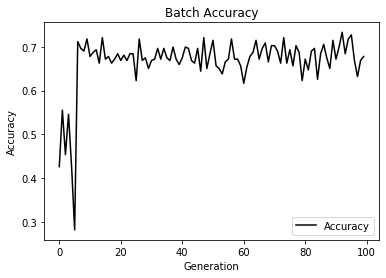

In [42]:
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.python.framework.graph_util import convert_variables_to_constants

In [ ]:
minimal_graph = convert_variables_to_constants(sess, sess.graph_def, ["Variable_6"])

tf.train.write_graph(minimal_graph, '.', 'minimal_graph.proto', as_text=False)
tf.train.write_graph(minimal_graph, '.', 'minimal_graph.txt', as_text=True)

In [ ]:
batch_accuracy

In [ ]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

In [ ]:
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='I. versicolor')
plt.plot(class3_x, class3_y, 'gv', label='I. virginica')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Pedal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])
plt.show()



plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()